# Linear Regression


## Libraries
Import the libraries we'll use:

- **Numpy** $\rightarrow$ Numeric Operations
- **Pandas** $\rightarrow$ read the CSV files
- **Matplotlib** $\rightarrow$ Plot the linear regression
- **Random** $\rightarrow$ for the SGD
- **SkLearn**  $\rightarrow$ to split the data, get the real linear regression values and metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Creating the functions for the Linear Regression

Return the predictions for the Salary (y)

In [2]:
def predict(w,x):
        return w[0] + w[1]*x

### Ordinary Least Squares

We only need $x$ and $y$ training sets

In [3]:
def OLS(x,y):
    n=len(x)
    sx=np.sum(x)
    sy=np.sum(y)
    sx2=np.sum(x**2)
    sxy=np.sum(x*y)

    b1=np.round((n*sxy-sx*sy)/(n*sx2-sx**2),4)
    b0=np.round(np.mean(y)-b1*np.mean(x),4)
    return b0,b1

### Batch Gradient Descent

We need:

- **Alpha** $\alpha$ (learning rate)
- $x$ and $y$ training sets
- **Epochs** (number of iterations)

In [4]:
def BGD(alpha, x, y, epochs):
    w=np.random.uniform(0, 0.5, 2)
    for e in range(epochs):
        predictions=predict(w,x)
        errors=predictions-y
        for i in range(len(w)):
            if(i==0):
                w[i]-= 2 * alpha * np.sum(errors)
            else:
                w[i]-= 2 * alpha * np.sum(errors * x)
            w[i]=np.round(w[i],4)
    return w

### Stochastic Gradient Descent

We need:

- **Alpha** $\alpha$ (learning rate)
- $x$ and $y$ training sets
- **Epochs** (number of iterations)


In [5]:
def SGD(alpha, x, y, epochs):
    w=np.random.uniform(0, 0.5, 2)
    n=len(w)
    for e in range(epochs):
        r=random.randint(0, len(y)-1)
        prediction=w[0] + w[1]*x.iloc[r]
        error=prediction-y.iloc[r]
        for i in range(n):
            if(i==0):
                w[i]-= 2 * alpha * error
            else:
                w[i]-= 2 * alpha * error * x.iloc[r]
            w[i]=np.round(w[i],4)
    return w

### Plot the Linear Regression

- **X** $\rightarrow$ Independent variables
- **Y** $\rightarrow$ Dependent variable
- **W** $\rightarrow$ estiamted coefficients for the linear Regresion
- **Title** $\rightarrow$ Title for the plot

In [6]:
def Plot1(x, y, w, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.style.use('default')
    plt.style.use('ggplot')

    ax.scatter(x, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
    ax.plot(x, predict(w,x), color='orange', label='Regression model')
    ax.set_ylabel('Salary (in thousands)', fontsize=14)
    ax.set_xlabel('Exp (in months)', fontsize=14)

    ax.legend(facecolor='white', fontsize=11)
    ax.set_title(title)
    fig.tight_layout()

## Reading and visualizing the data

In [7]:
df = pd.read_csv("Experience-Salary.csv")
print(df.shape)
df.head()

(1000, 2)


,exp,salary
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


Text(0.5, 1.0, 'Data')

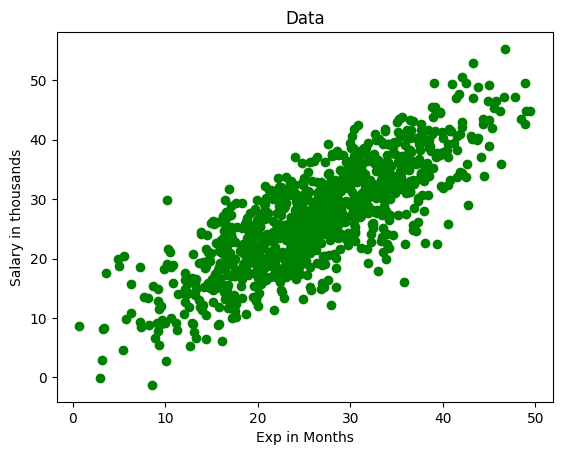

In [8]:
plt.scatter(df['exp'], df['salary'], color='green')
plt.ylabel('Salary in thousands')
plt.xlabel('Exp in Months')
plt.title('Data')

### Split the Data
Split the data into a training and test set. The training set will contain the 80% of the original dataset.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['exp'], df['salary'], test_size=0.2, random_state=42)

## Actual values of the linear regression

We will use the help of SkLearn to get the real values of b0 and b1 for the linear regression, then we will evaluate the Coefficient of Determination

In [10]:
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1, 1), np.array(y_train))
y_pred = model.predict(np.array(X_test).reshape(-1, 1))

b0 = model.intercept_
print(f"Value of b0 (intercept): {b0:.4f}")

b1 = model.coef_[0]
print(f"Value of b1 (slope): {b1:.4f}")

Value of b0 (intercept): 4.9112
Value of b1 (slope): 0.8336


Sum of Squared Errors and $r^2$

In [11]:
sse = np.sum((y_test - y_pred) ** 2)
print(f"Sum of Squared Errors (SSE): {sse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"coefficient of determination (R^2): {r2:.4f}")

Sum of Squared Errors (SSE): 5530.0537
coefficient of determination (R^2): 0.6208


### OLS

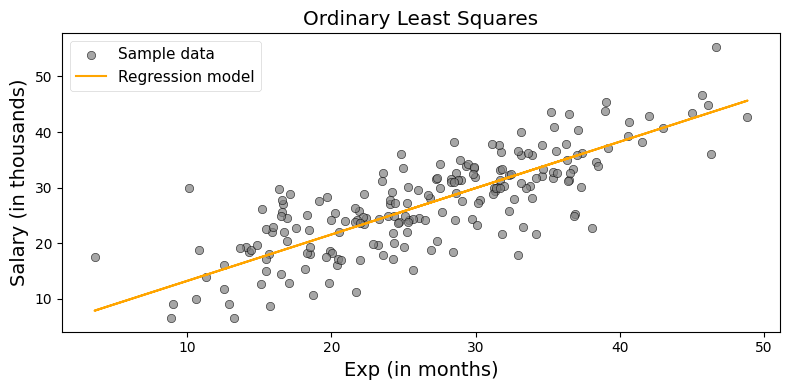

In [12]:
w = OLS(X_train, y_train)
Plot1(X_test, y_test, w, 'Ordinary Least Squares')

In [13]:
print(f"Value of b0 (intercept): {w[0]:.4f}")
print(f"Value of b1 (slope): {w[1]:.4f}")

Value of b0 (intercept): 4.9114
Value of b1 (slope): 0.8336


In [14]:
y_pred=predict(w, X_test)
sse = np.sum((y_test - y_pred) ** 2)
print(f"Sum of Squared Errors (SSE): {sse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"coefficient of determination (R^2): {r2:.4f}")

Sum of Squared Errors (SSE): 5530.0405
coefficient of determination (R^2): 0.6208


## Batch Gradient Descent

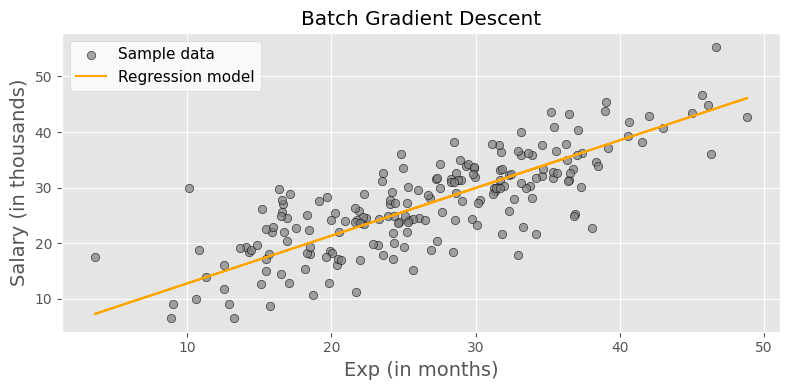

In [15]:
wB = BGD(0.000001, X_train, y_train, 12000)
Plot1(X_test, y_test, wB, "Batch Gradient Descent")

In [16]:
print(f"Value of b0 (intercept): {wB[0]:.4f}")
print(f"Value of b1 (slope): {wB[1]:.4f}")

Value of b0 (intercept): 4.2229
Value of b1 (slope): 0.8574


In [17]:
y_pred=predict(wB, X_test)
sse = np.sum((y_test - y_pred) ** 2)
print(f"Sum of Squared Errors (SSE): {sse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"coefficient of determination (R^2): {r2:.4f}")

Sum of Squared Errors (SSE): 5578.7946
coefficient of determination (R^2): 0.6175


## Stochastic Gradient Descent

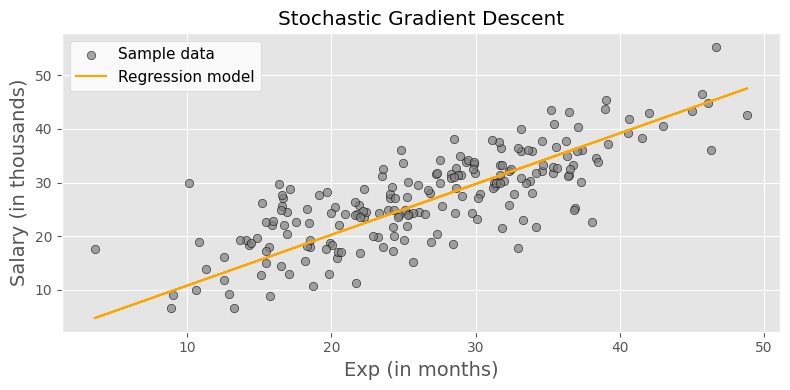

In [18]:
wS = SGD(0.0001, X_train, y_train, 15500)
Plot1(X_test, y_test, wS, "Stochastic Gradient Descent")

In [19]:
print(f"Value of b0 (intercept): {wS[0]:.4f}")
print(f"Value of b1 (slope): {wS[1]:.4f}")

Value of b0 (intercept): 1.3436
Value of b1 (slope): 0.9463


In [20]:
y_pred=predict(wS, X_test)
sse = np.sum((y_test - y_pred) ** 2)
print(f"Sum of Squared Errors (SSE): {sse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"coefficient of determination (R^2): {r2:.4f}")

Sum of Squared Errors (SSE): 5975.5285
coefficient of determination (R^2): 0.5903


## Conclusions

As we can see the real values of the Coefficients to make the linear regression are:

- **$bo \rightarrow$** 4.9112
- **$b1 \rightarrow$** 0.8336

**OLS** and **BGD** were the most successful, while **SGD** was not as successful as we wanted it to be, because the value of the intercep was a little bif far away, but still performed well.